<center>
<h1>EJERICIO 1.</h1>
</center>

Utilizando el metodo de proyeccion de Galerkin encuentre los coeficientes que permiten aproximar la función en cada caso. Se sabe que una función aproximada se escrie de la siguiente manera 

$$ f(x) \approx \sum_{i=0}^{n} \alpha_i u_i(x) $$

Se tiene como problema encontrar los coeficientes $\alpha_i$ con los cuales se obtenga un error muy bajo entre la función real y la función aproximada.

Para darle solución a este problema, se define una siguiente función en la que se hace la aproximación nuemérica, en esta se incluye una matriz $A$ que contiene las funciones base que sirven para aproximar la función original; esta también contiene un vector $x$ en donde están los coeficientes $\alpha_i$, y por útltimo se tiene el vector $b$ del producto de la función a aproximar con la funcón base. Es decir, se tiene el siguiente sistema: 


$$A = [a_{ij}] = \mathbf{u}_i(x)\cdot \mathbf{u}_j(x) = \int \limits _\Omega u_i(x) u_j(x) dx $$

$$b = [b_i] = f(x) \cdot \mathbf{u}_i(x)  = \int \limits _\Omega f(x) u_i(x)dx$$

$$x = \alpha_i $$

De lo anterior, el problema toma la siguiente solución:  $$ x = A^{-1}b $$



In [22]:
# Importacion de librerias
import numpy as np
import sympy as sym 
from numpy.linalg import det, inv
from scipy.integrate import quad
from sympy import symbols, Piecewise, pi
from sympy.plotting import plot
import matplotlib.pyplot as plt

In [23]:
def aproximacion_num(f, ui, lim):
    n = len(ui)                                                                 # Numero de iteraciones (cantidad de funciones base) 
    x = sym.Symbol('x')                                                         # Simbolo de la variable independiente 
    A = sym.zeros(n,n)                                                          # Matriz de la longitud de la cantidad de polinomios
    b = sym.zeros(n,1)                                                          # Vector de la funcion por el polinomio

    for i in range(n):
        for j in range(i, n): 

            funcion = sym.lambdify(x, ui[i]*ui[j])                              # Se toma valores numerico para "x" y con ellos se evalua ui[i]*ui[j]

            A[i,j] = quad(funcion, lim[0], lim[1])[0]                           # Integra la funcion de lambda en los limites establecidos y lo asocia a las posiciones i j de la matriz
            A[j,i] = A[i,j]

        funcion = sym.lambdify(x, ui[i]*f)

        b[i,0] = quad(funcion, lim[0], lim[1])[0]                               # Integra la funcion de lambda en los limites establecidos y toma solo el valor asociado a i

    alp = A.LUsolve(b)                                                          # Se resuelve el sistema para encontrar los coeficientes

    fg= 0                                                                       # Se inicia la función aproximada en cero 

    for i in range(n):
        fg += alp[i,0]*ui[i]                                                    # Se va agregando en cada iteracion

    funcion = sym.lambdify(x, (f-fg)*(f-fg))
    e  = np.sqrt(quad(funcion, lim[0], lim[1])[0])                              # Magnitud del error

    print(f"El error entre la funcion real y la aproximada es de:\n {e}")

    return A, b, fg, alp

    

$a.$ Aproximar $tan(x)$ sobre el conjunto {1, $e^{−x}$, $e^{−2x}$, $e^{x}$, $e^{2x}$}, en el intervalo [0, π/4]

El error entre la funcion real y la aproximada es de:
 67.36080866032759

La funcion aproximada es: 
 -0.395521696055398*exp(2*x) + 1.74621445957204*exp(x) + 3.10862446895044e-15 - 1.74621445957204*exp(-x) + 0.395521696055398*exp(-2*x)



C:\Users\penak\AppData\Local\Temp\ipykernel_11556\3698041467.py:17: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  b[i,0] = quad(funcion, lim[0], lim[1])[0]                               # Integra la funcion de lambda en los limites establecidos y toma solo el valor asociado a i
C:\Users\penak\AppData\Local\Temp\ipykernel_11556\3698041467.py:27: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  e  = np.sqrt(quad(funcion, lim[0], lim[1])[0])                              # Magnitud del error


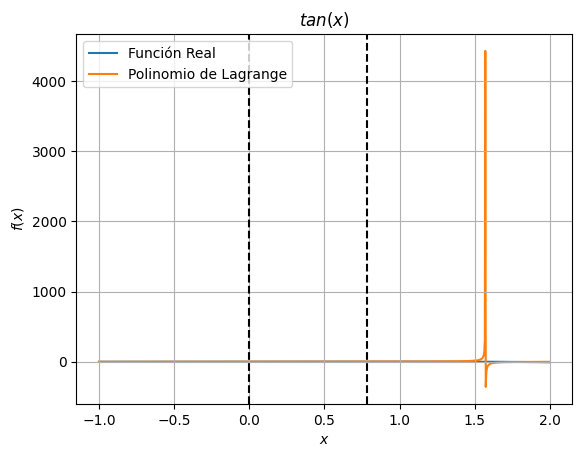

In [37]:
x = sym.Symbol('x')                                                                     # Variable independiente de forma simbolica
f = sym.tan(x)                                                                          # Funcion a aproximar
ui = [1, sym.exp(-x), sym.exp(-2*x), sym.exp(x), sym.exp(2*x)]                          # Funciones base de aproximacion
lim = [-2, 2]                                                                    # Rango en el que se hace la integracion

A, b, fg, alp = aproximacion_num(f, ui, lim)

fg                                                                                      # Funcion aproximada 
print(f"\nLa funcion aproximada es: \n {fg}\n")

# GRAFICO  
xp = np.linspace(-1, 2, 1000)
#xp = np.linspace(-1, (np.pi)/4)
fp = sym.lambdify(x,fg)(xp)
fr = sym.lambdify(x,f)(xp)

fig, ax1 = plt.subplots()

ax1.plot(xp,fp, zorder=0, label="Función Real")
ax1.plot(xp,fr, zorder=1, label="Polinomio de Lagrange")
ax1.set_title("$tan(x)$")
ax1.axvline(0, color='k', linestyle='--')
ax1.axvline((np.pi)/4, color='k', linestyle='--')
ax1.grid()
ax1.set_xlabel("$x$")
ax1.set_ylabel("$f(x)$")
ax1.legend()

El área encerrada por las lineas punteadas corresponde al áreal entre los limites solicitados y de mejor aproximación

$b.$ Aproximar $f(x) = \frac{d^2}{dx^2}(e^{-x^2})$, sobre el conjunto {$sin(iπx)$, $cos(iπx)$}, con $i$ ∈ ${1, 2, 3}$, en el intervalo $[−5, 5]$

El error entre la funcion real y la aproximada es de:
 1.8220231109328386

La funcion aproximada es: 
 -0.296705771889363*cos(3.14159265358979*x) - 0.00072385230661013*cos(6.28318530717959*x) - 7.11477485870297e-9*cos(9.42477796076938*x) - 2.11642378651709e-11*cos(12.5663706143592*x) + 1.55992771366842e-11*cos(15.707963267949*x) - 1.17961571484188e-11*cos(18.8495559215388*x) + 9.1516028101709e-12*cos(21.9911485751286*x) - 7.27536839878683e-12*cos(25.1327412287183*x)



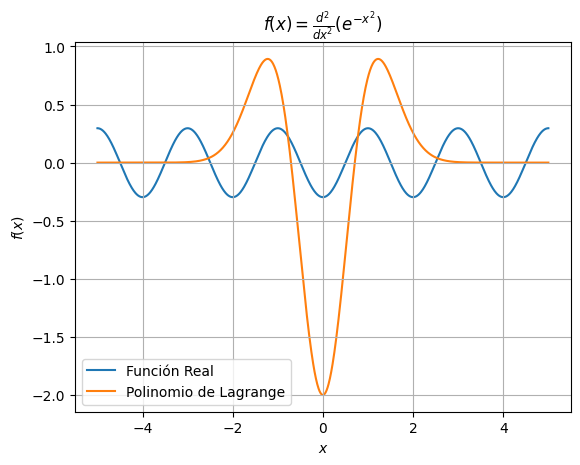

In [25]:
x = sym.Symbol('x')                                                                     # Variable independiente de forma simbolic                                     
derivada_2 = sym.exp(-x**2).diff(x,x)                                                   # Funcion a aproximar
ui = []                                                                                 # Funciones base de aproximacion
lim = [-5,5]                                                                            # Rango en el que se hace la integracion

ni = 8

for i in range(1, ni+1):
    ui.append(sym.sin(i*np.pi*x))
    ui.append(sym.cos(i*np.pi*x)) 

A, b, fg, alp = aproximacion_num(derivada_2,ui, lim)

fg                                                                                      # Funcion aproximada 
print(f"\nLa funcion aproximada es: \n {fg}\n")

# GRAFICO DE LAS FUNCIONES
xp = np.linspace(-5,5,1000)
fp = sym.lambdify(x,fg)(xp)
fr = sym.lambdify(x, derivada_2)(xp)

fig, ax1 = plt.subplots()

ax1.plot(xp,fp, zorder=0, label="Función Real")
ax1.plot(xp,fr, zorder=1, label="Polinomio de Lagrange")
ax1.set_title(r"$f(x) = \frac{d^2}{dx^2}(e^{-x^2})$")
ax1.grid()
ax1.set_xlabel("$x$")
ax1.set_ylabel("$f(x)$")
ax1.legend()


$c.$ f(x) = $e^{−x^{2}}$+ $0.5 e^{−10(x−2.5)^{2}}$, sobre el conjunto {$1, x, x^{2}, x^{3}, x^{4}, x^{5}$}, en el intervalo [−2, 4]

El error entre la funcion real y la aproximada es de:
 0.35395011099056606

La funcion aproximada es: 
 -0.0118957196778012*x**5 + 0.0535719952843212*x**4 + 0.0630927148339173*x**3 - 0.412976319014695*x**2 - 0.0350468286446076*x + 0.844037636831369



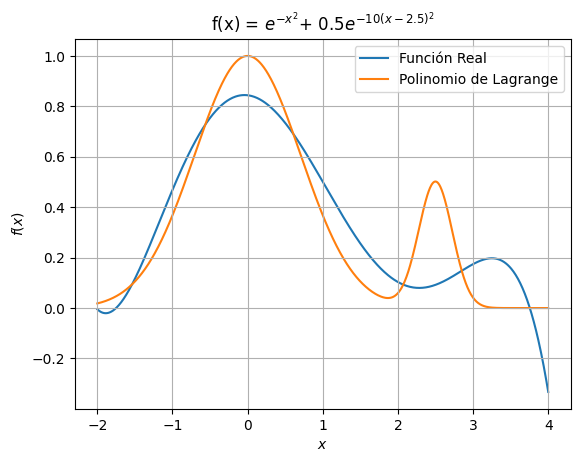

In [26]:
x = sym.Symbol('x')                                                                 # Variable independiente de forma simbolica
f = sym.exp(-x**2) + 0.5 * sym.exp(-10*(x-2.5)**2)                                  # Funcion a aproximar
ui = [1, x, x**2, x**3, x**4, x**5]                                                 # Funciones base de aproximacion
lim = [-2, 4]                                                                       # Rango en el que se hace la integracion

A, b, fg, alp = aproximacion_num(f, ui, lim)

fg                                                                                  # Funcion aproximada 
print(f"\nLa funcion aproximada es: \n {fg}\n")

# GRAFICO DE LAS FUNCIONES
xp = np.linspace(-2, 4,1000)
fp = sym.lambdify(x,fg)(xp)
fr = sym.lambdify(x, f)(xp)

fig, ax1 = plt.subplots()

ax1.plot(xp,fp, zorder=0, label="Función Real")
ax1.plot(xp,fr, zorder=1, label="Polinomio de Lagrange")
ax1.set_title(r"f(x) = $e^{−x^{2}}$+ $0.5 e^{−10(x−2.5)^{2}}$")
ax1.grid()
ax1.set_xlabel("$x$")
ax1.set_ylabel("$f(x)$")
ax1.legend()